# NOAA National Data Buoy Center

<img style="float: right;" src="DataSetSources.png" width="500">

## Project Decription: Create a surf forecast model using NOAA buoy data

## Links to Data:

### [Edisto Offshore Data](https://www.ndbc.noaa.gov/station_history.php?station=41004)

### [ENE Nassau Offshore Data](https://www.ndbc.noaa.gov/station_history.php?station=41047)

### Team Members:

### [*Jill Sirignano*](https://github.com/sirignanoj)

### [*Evan Tanner*](https://github.com/surfevant)

### [*Alex Swanson*](https://github.com/EyYoTony)

In [1]:
#import Libraries
import os
import pandas as pd
import numpy as np
from IPython.display import display, HTML

#will have to change depending on relative os path
os.chdir('/home/loki/Desktop/Final_Project/Data-Mining-Project/DataSets')

#dataframes for feature extraction (need to clean)
nsTemp = pd.read_csv('formatted_Edisto.csv')
osTemp = pd.read_csv('formatted_Bahamas.csv')

#dropping TIDE and VIS_MI 99 values
nsDf = nsTemp.drop(columns=['VIS_mi','TIDE_ft'])
osDf = osTemp.drop(columns=['VIS_mi','TIDE_ft'])

#Dropping the errors(99,999,9999)
nsDf = nsDf.replace(99,np.NaN)
osDf = osDf.replace(99,np.NaN)
nsDf = nsDf.replace(999,np.NaN)
osDf = osDf.replace(999,np.NaN)
nsDf = nsDf.replace(9999,np.NaN)
osDf = osDf.replace(9999,np.NaN)

In [2]:
#check data was loaded for both sets (mm is always 50)
print("Nearshore")
display(nsDf.head(3))
print("Offshore")
display(osDf.head(3))

Nearshore


,#YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
0,2014,12,31,23,50,18.0,4.9,7.3,1.25,10.81,5.21,85.0,1027.7,11.3,23.4,3.5
1,2015,1,1,0,50,17.0,5.1,7.2,1.21,6.25,5.09,69.0,1027.9,11.4,23.2,3.3
2,2015,1,1,1,50,2.0,5.0,6.6,1.21,10.81,5.39,76.0,1028.2,11.3,22.9,1.8


Offshore


,#YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
0,2014,12,31,23,50,97.0,1.8,2.7,1.24,8.33,5.75,4.0,1022.1,23.6,25.4,19.6
1,2015,1,1,0,50,94.0,1.6,2.3,1.29,7.14,5.89,100.0,1022.2,23.8,25.4,19.9
2,2015,1,1,1,50,168.0,0.1,0.4,1.22,8.33,5.96,11.0,1022.4,23.9,25.4,19.6


In [3]:
#dimensions of Dataframes
print("Nearshore: " + str(nsDf.shape))
print("Offshore: "+ str(osDf.shape))

#data typessame for nearshore and offshore
print("\n Data Types:\n")
nsDf.dtypes

Nearshore: (8743, 16)
Offshore: (8728, 16)

 Data Types:



#YY            int64
MM             int64
DD             int64
hh             int64
mm             int64
WDIR_degt    float64
WSPD_ms      float64
GST_ms       float64
WVHT_m       float64
DPD_sec      float64
APD_sec      float64
MWD_degt     float64
PRES_hpa     float64
ATMP_degc    float64
WTMP_degc    float64
DEWP_degc    float64
dtype: object

In [4]:
#remove unnecessary data
nsStats = nsDf.drop(columns=['#YY','MM', 'DD','hh','mm'])
osStats = osDf.drop(columns=['#YY','MM', 'DD','hh','mm'])

#output of dataframe statistics
print("Nearshore Dataframe Stats:")
display(nsStats.describe())
print("Offshore Dataframe Stats:")
display(osStats.describe())

Nearshore Dataframe Stats:


,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
count,8726.000000,8743.000000,8743.000000,8737.000000,8737.000000,8737.000000,8661.000000,8743.000000,8743.000000,8741.000000,8740.000000
mean,158.480862,6.806394,8.361867,1.332740,7.308141,5.118455,125.692068,1017.591799,22.001258,24.684521,17.177071
std,103.661669,3.155170,3.781697,0.637057,2.006430,0.817716,62.420257,5.922055,5.791476,3.220459,7.174560
min,1.000000,0.000000,0.100000,0.270000,2.740000,3.000000,1.000000,996.100000,-1.000000,13.400000,-9.100000
25%,54.000000,4.500000,5.600000,0.880000,5.560000,4.490000,85.000000,1013.700000,19.200000,21.900000,13.500000
50%,178.000000,6.600000,8.000000,1.170000,7.140000,5.000000,116.000000,1017.300000,23.400000,24.900000,19.300000
75%,235.000000,8.900000,10.900000,1.620000,9.090000,5.640000,150.000000,1021.300000,26.600000,27.700000,22.700000
max,360.000000,17.800000,22.800000,4.870000,14.810000,8.720000,359.000000,1034.700000,29.600000,31.400000,26.500000


Offshore Dataframe Stats:


,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
count,8689.000000,8725.000000,8724.000000,8719.000000,8719.00000,8719.000000,8670.000000,8727.000000,8725.000000,8724.000000,8723.000000
mean,151.436529,5.641937,6.982932,1.625986,8.81651,6.146150,114.966782,1018.190867,25.293318,26.523705,20.513562
std,84.730175,2.808128,3.313301,0.826906,1.89357,0.944327,86.015598,4.600063,2.738242,2.354880,3.702322
min,1.000000,0.000000,0.100000,0.450000,3.57000,4.000000,1.000000,986.300000,16.400000,21.900000,6.100000
25%,85.000000,3.600000,4.600000,1.080000,7.69000,5.470000,60.000000,1015.800000,23.500000,24.700000,18.700000
50%,140.000000,5.500000,6.600000,1.430000,8.33000,6.050000,100.000000,1018.400000,25.100000,25.900000,21.500000
75%,209.000000,7.500000,9.100000,1.970000,10.00000,6.700000,128.000000,1021.200000,28.000000,28.900000,23.300000
max,360.000000,19.300000,25.000000,7.560000,16.00000,11.060000,360.000000,1029.400000,31.000000,32.400000,26.000000


In [5]:
#nearshore wave height statistics
print('Nearshore Wave Height Statistics')
display(nsDf['WVHT_m'].describe())

#offshore wave height statistics
print('Offshore Wave Height Statistics')
display(osDf['WVHT_m'].describe())

Nearshore Wave Height Statistics


count    8737.000000
mean        1.332740
std         0.637057
min         0.270000
25%         0.880000
50%         1.170000
75%         1.620000
max         4.870000
Name: WVHT_m, dtype: float64

Offshore Wave Height Statistics


count    8719.000000
mean        1.625986
std         0.826906
min         0.450000
25%         1.080000
50%         1.430000
75%         1.970000
max         7.560000
Name: WVHT_m, dtype: float64

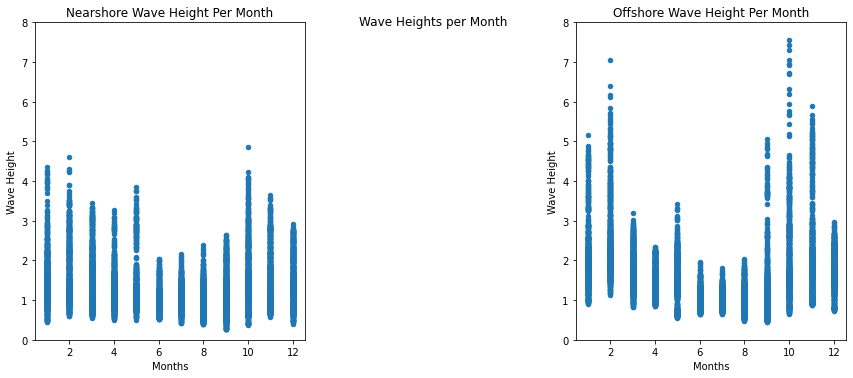

In [6]:
#the wave height for months in the year (nearshore)
import matplotlib.pyplot as plt

#configure graphs for subplots
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
ax, ax2 = axes
fig.tight_layout()
plt.subplots_adjust(wspace =1)
plt.suptitle('Wave Heights per Month')

#the wave height for months in the year (nearshore)
nsPlot = nsDf.plot(kind='scatter', x='MM', y='WVHT_m',ylim=(0,8), ax = ax)
nsPlot.set_title('Nearshore Wave Height Per Month')
nsPlot.set_xlabel('Months')
nsPlot.set_ylabel('Wave Height')

#the wave height for months in the year (offshore)
#ax2 = plt.subplot(222)
osPlot = osDf.plot(kind='scatter', x='MM', y='WVHT_m',ylim=(0,8), ax = ax2)
osPlot.set_title('Offshore Wave Height Per Month')
osPlot.set_xlabel('Months')
osPlot.set_ylabel('Wave Height')
plt.show()

In [7]:
#returns the row(s) of largest wave height in nearshore data
print("Max Wave Height in Nearshore:")
display(nsDf[nsDf['WVHT_m']== nsDf['WVHT_m'].max()])

#returns the row of largest wave height in offshore data
print("Max Wave Height in Offshore:")
display(osDf[osDf['WVHT_m'] == osDf['WVHT_m'].max()])

#returns the row(s) of smallest wave height in nearshore data ( < 99 )
print("Smallest Wave Height in Offshore:")
display(osDf[osDf['WVHT_m'] == osDf['WVHT_m'].min()])

#returns the row(s) of smallest wave height in nearshore data
print("Smallest Wave(s) Height in Nearshore:")
display(nsDf[nsDf['WVHT_m' ] == nsDf['WVHT_m'].min()])


Max Wave Height in Nearshore:


,#YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
6618,2015,10,4,5,50,135.0,10.8,13.1,4.87,10.0,7.76,89.0,999.8,24.7,27.2,23.7


Max Wave Height in Offshore:


,#YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
6590,2015,10,3,18,50,70.0,19.3,25.0,7.56,9.09,9.0,120.0,986.9,27.1,28.8,23.8


Smallest Wave Height in Offshore:


,#YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
5944,2015,9,6,17,50,320.0,0.4,0.9,0.45,8.33,5.77,111.0,1015.4,28.4,30.9,21.9


Smallest Wave(s) Height in Nearshore:


,#YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
5921,2015,9,5,2,50,37.0,2.5,3.3,0.27,6.25,4.94,115.0,1015.7,27.9,29.2,24.0
5924,2015,9,5,5,50,21.0,1.4,2.1,0.27,11.43,4.97,82.0,1015.1,27.7,29.2,23.0
5925,2015,9,5,6,50,29.0,1.9,2.8,0.27,11.43,5.79,86.0,1014.9,27.6,29.1,23.4
5926,2015,9,5,7,50,8.0,5.4,6.3,0.27,10.81,5.59,84.0,1015.3,27.6,29.0,23.5


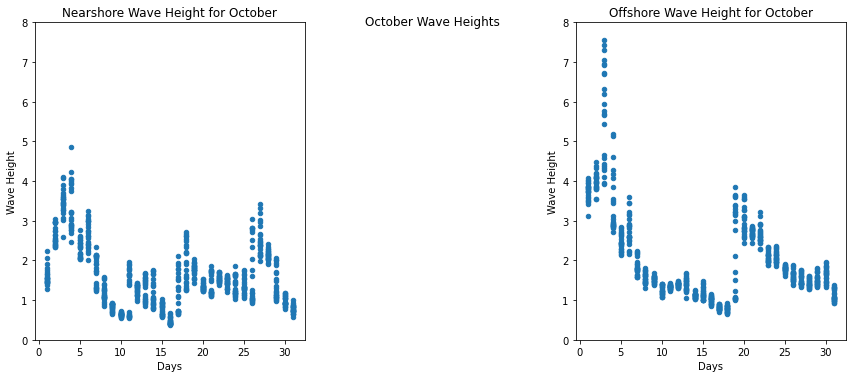

In [8]:
#october Scatter plot (wave size was biggest)
nsOct = nsDf[nsDf['MM'] == 10]
osOct = osDf[osDf['MM'] == 10]

#configure graphs for subplots
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
ax, ax2 = axes
fig.tight_layout()
plt.subplots_adjust(wspace =1)
plt.suptitle('October Wave Heights')

#could possibly find data from extremities
nsOctPlot = nsOct.plot(kind='scatter', x='DD', y='WVHT_m',ylim=(0,8), ax = ax)
nsOctPlot.set_title('Nearshore shore Wave Height in October')
nsOctPlot.set_title('Nearshore Wave Height for October')
nsOctPlot.set_xlabel('Days')
nsOctPlot.set_ylabel('Wave Height')

osOctPlot = osOct.plot(kind='scatter', x='DD', y='WVHT_m',ylim=(0,8), ax = ax2)
osOctPlot.set_title('Nearshore shore Wave Height in October')
osOctPlot.set_title('Offshore Wave Height for October')
osOctPlot.set_xlabel('Days')
osOctPlot.set_ylabel('Wave Height')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

#dropping unnecessary
cleanNs = nsDf.drop(columns=['#YY','MM', 'DD','hh','mm'])
cleanOs = osDf.drop(columns=['#YY','MM', 'DD','hh','mm'])

#clean NaNs for PCA
cleanNs = cleanNs.dropna()
cleanOs = cleanOs.dropna()


#change to categorical values
cleanNs['WVHT_m'] = np.where(cleanNs['WVHT_m'] < 2, 'noSurf','surf')
cleanOs['WVHT_m'] = np.where(cleanOs['WVHT_m'] < 2, 'noSurf','surf')

#split data into test and training data sets
nsTrain, nsTest = train_test_split(cleanNs, test_size=0.33)
osTrain, osTest = train_test_split(nsDf, test_size=0.33)

#test and train dimensions
print('Nearshore Test Size: ', nsTest.shape)
print('Offshore Test Size: ', osTest.shape)
print('Nearshore Train Size: ', nsTrain.shape)
print('Offshore Train Size: ', osTrain.shape)

Nearshore Test Size:  (2852, 11)
Offshore Test Size:  (2886, 16)
Nearshore Train Size:  (5790, 11)
Offshore Train Size:  (5857, 16)


In [10]:
# the general convention is the X represents raw data and y represents labels
nsTrain_x = nsTrain.iloc[:, nsTrain.columns != 'WVHT_m']
nsTrain_y = nsTrain['WVHT_m']

nsTest_x = nsTest.iloc[:, nsTest.columns != 'WVHT_m']
nsTest_y = nsTest['WVHT_m']

print(nsTrain_x.shape)
print(nsTrain_y.shape)

(5790, 10)
(5790,)


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

####### Being worked on
#standardize the data sets
#nsTrain = StandardScaler().fit_transform(nsTrain)
#osTrain = StandardScaler().fit_transform(osTrain)

#pca model
#pca = decomposition.PCA(n_components=3)
#pca.fit(nsTrain_x)
#trainX = pca.transform(nsTrain_)

#display(pd.DataFrame(nsTrain).head(5))

#pca = decomposition.PCA(n_components=3)
#pca.fit(nsTrain)
#trainX = pca.transform(nsTrain)

In [17]:
#from sklearn.tree import DecisionTreeClassifier
# fit a model to the data
#model = DecisionTreeClassifier()
# model.fit(train.iloc[:,:-1], train['target'])

#model.fit(nsTrain_X,nsTrain_Y)